## Monk-1 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]
ytrain = ytrain.reshape(ytrain.shape[0], 1)
ytest = ytest.reshape(ytest.shape[0], 1)

In [2]:
Xtrain.shape

(124, 17)

In [3]:
import numpy as np

from wavegrad.utility import train_test_split
from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *

# network
net = Sequential()
net.add(LayerDense(17, 4, sigmoid))
net.add(LayerDense(4, 1, tanh))
optim = GD(net.layers, lr=0.01, momentum=0.6)
# train
net.use(MSE)
net.fit(Xtrain, ytrain, epochs=1000, optimizer=optim, validation_split=0.2)

epoch 7/1000   error=0.24    accuracy=0.60    val_error=0.23    val_acc=0.56:   0%|          | 4/1000 [00:00<00:28, 34.48it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 15/1000   error=0.20    accuracy=0.78    val_error=0.18    val_acc=0.84:   1%|          | 12/1000 [00:00<00:27, 36.11it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 22/1000   error=0.18    accuracy=0.81    val_error=0.17    val_acc=0.68:   2%|▏         | 21/1000 [00:00<00:26, 36.94it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 30/1000   error=0.17    accuracy=0.79    val_error=0.17    val_acc=0.68:   3%|▎         | 30/1000 [00:00<00:25, 38.02it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 37/1000   error=0.17    accuracy=0.79    val_error=0.17    val_acc=0.72:   3%|▎         | 34/1000 [00:00<00:26, 36.85it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 45/1000   error=0.16    accuracy=0.80    val_error=0.17    val_acc=0.72:   4%|▍         | 42/1000 [00:01<00:25, 37.10it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 53/1000   error=0.16    accuracy=0.80    val_error=0.17    val_acc=0.72:   5%|▌         | 51/1000 [00:01<00:25, 37.90it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 62/1000   error=0.15    accuracy=0.81    val_error=0.16    val_acc=0.76:   6%|▌         | 60/1000 [00:01<00:24, 38.85it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 69/1000   error=0.15    accuracy=0.83    val_error=0.15    val_acc=0.80:   7%|▋         | 68/1000 [00:01<00:24, 38.20it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 77/1000   error=0.13    accuracy=0.84    val_error=0.14    val_acc=0.84:   8%|▊         | 77/1000 [00:02<00:23, 39.31it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 86/1000   error=0.12    accuracy=0.85    val_error=0.13    val_acc=0.88:   8%|▊         | 82/1000 [00:02<00:23, 39.79it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 93/1000   error=0.11    accuracy=0.87    val_error=0.12    val_acc=0.88:   9%|▉         | 92/1000 [00:02<00:23, 37.89it/s]


(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17

epoch 100/1000   error=0.10    accuracy=0.88    val_error=0.12    val_acc=0.84:  10%|█         | 100/1000 [00:02<00:24, 36.64it/s]


(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17

epoch 108/1000   error=0.09    accuracy=0.89    val_error=0.11    val_acc=0.88:  11%|█         | 108/1000 [00:02<00:23, 37.36it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 116/1000   error=0.08    accuracy=0.92    val_error=0.11    val_acc=0.88:  11%|█▏        | 113/1000 [00:03<00:23, 38.18it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 124/1000   error=0.07    accuracy=0.96    val_error=0.10    val_acc=0.88:  12%|█▏        | 123/1000 [00:03<00:22, 39.60it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 133/1000   error=0.06    accuracy=0.96    val_error=0.08    val_acc=0.96:  13%|█▎        | 128/1000 [00:03<00:21, 40.00it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 141/1000   error=0.05    accuracy=0.98    val_error=0.06    val_acc=0.96:  14%|█▍        | 138/1000 [00:03<00:20, 41.14it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 149/1000   error=0.04    accuracy=1.00    val_error=0.05    val_acc=1.00:  15%|█▍        | 148/1000 [00:03<00:20, 41.24it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 157/1000   error=0.03    accuracy=1.00    val_error=0.03    val_acc=1.00:  15%|█▌        | 153/1000 [00:04<00:20, 40.65it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 165/1000   error=0.02    accuracy=1.00    val_error=0.02    val_acc=1.00:  16%|█▋        | 163/1000 [00:04<00:21, 39.59it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 173/1000   error=0.02    accuracy=1.00    val_error=0.02    val_acc=1.00:  17%|█▋        | 172/1000 [00:04<00:20, 39.45it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 181/1000   error=0.01    accuracy=1.00    val_error=0.01    val_acc=1.00:  18%|█▊        | 177/1000 [00:04<00:20, 40.00it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 188/1000   error=0.01    accuracy=1.00    val_error=0.01    val_acc=1.00:  19%|█▊        | 186/1000 [00:04<00:20, 39.53it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 196/1000   error=0.01    accuracy=1.00    val_error=0.01    val_acc=1.00:  19%|█▉        | 194/1000 [00:05<00:20, 38.52it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 204/1000   error=0.01    accuracy=1.00    val_error=0.01    val_acc=1.00:  20%|██        | 203/1000 [00:05<00:20, 39.51it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 213/1000   error=0.01    accuracy=1.00    val_error=0.01    val_acc=1.00:  21%|██        | 212/1000 [00:05<00:19, 39.68it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 221/1000   error=0.00    accuracy=1.00    val_error=0.01    val_acc=1.00:  22%|██▏       | 217/1000 [00:05<00:19, 40.20it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 229/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  23%|██▎       | 227/1000 [00:05<00:18, 40.95it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 237/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  24%|██▎       | 236/1000 [00:06<00:19, 39.07it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 245/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  24%|██▍       | 241/1000 [00:06<00:19, 39.46it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 252/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  25%|██▌       | 251/1000 [00:06<00:19, 39.03it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 260/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  26%|██▌       | 259/1000 [00:06<00:20, 36.87it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 268/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  26%|██▋       | 264/1000 [00:06<00:19, 38.15it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 276/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  27%|██▋       | 274/1000 [00:07<00:18, 39.47it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 284/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  28%|██▊       | 282/1000 [00:07<00:18, 38.46it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 292/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  29%|██▉       | 291/1000 [00:07<00:18, 38.78it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 300/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  30%|███       | 300/1000 [00:07<00:17, 39.41it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 308/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  30%|███       | 305/1000 [00:07<00:17, 39.24it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 316/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  31%|███▏      | 314/1000 [00:08<00:17, 39.86it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 324/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  32%|███▏      | 323/1000 [00:08<00:16, 39.99it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 332/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  33%|███▎      | 328/1000 [00:08<00:17, 39.42it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 340/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  34%|███▍      | 338/1000 [00:08<00:16, 40.10it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 349/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  35%|███▍      | 348/1000 [00:08<00:15, 41.14it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 357/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  35%|███▌      | 353/1000 [00:09<00:15, 40.82it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 364/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  36%|███▋      | 363/1000 [00:09<00:15, 40.25it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 372/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  37%|███▋      | 368/1000 [00:09<00:16, 39.14it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 380/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  38%|███▊      | 378/1000 [00:09<00:15, 39.80it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 389/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  39%|███▊      | 387/1000 [00:09<00:15, 39.63it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 397/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  40%|███▉      | 397/1000 [00:10<00:14, 40.41it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 405/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  40%|████      | 402/1000 [00:10<00:14, 40.52it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 412/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  41%|████      | 411/1000 [00:10<00:15, 38.72it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 420/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  42%|████▏     | 419/1000 [00:10<00:15, 38.69it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 428/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  42%|████▏     | 424/1000 [00:10<00:14, 39.27it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 437/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  43%|████▎     | 434/1000 [00:11<00:14, 40.27it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 445/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  44%|████▍     | 444/1000 [00:11<00:13, 40.48it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 453/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  45%|████▍     | 449/1000 [00:11<00:13, 40.88it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 462/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  46%|████▌     | 459/1000 [00:11<00:13, 41.39it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 470/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  47%|████▋     | 469/1000 [00:11<00:12, 41.46it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 479/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  48%|████▊     | 479/1000 [00:12<00:12, 41.64it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 487/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  48%|████▊     | 484/1000 [00:12<00:12, 41.38it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 495/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  49%|████▉     | 494/1000 [00:12<00:12, 41.32it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 504/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  50%|█████     | 504/1000 [00:12<00:11, 41.62it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 512/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  51%|█████     | 509/1000 [00:12<00:11, 41.91it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 521/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  52%|█████▏    | 519/1000 [00:13<00:11, 42.08it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 529/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  53%|█████▎    | 529/1000 [00:13<00:11, 42.12it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 537/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  53%|█████▎    | 534/1000 [00:13<00:11, 42.13it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 546/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  54%|█████▍    | 544/1000 [00:13<00:10, 41.91it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 554/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  55%|█████▌    | 554/1000 [00:13<00:10, 42.02it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 563/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  56%|█████▌    | 559/1000 [00:14<00:10, 42.11it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 571/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  57%|█████▋    | 569/1000 [00:14<00:10, 41.05it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 579/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  58%|█████▊    | 579/1000 [00:14<00:10, 41.16it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 588/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  58%|█████▊    | 584/1000 [00:14<00:10, 41.41it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 596/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  59%|█████▉    | 594/1000 [00:14<00:09, 41.41it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 604/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  60%|██████    | 604/1000 [00:15<00:09, 41.64it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 613/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  61%|██████    | 609/1000 [00:15<00:09, 41.50it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 621/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  62%|██████▏   | 619/1000 [00:15<00:09, 41.29it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 629/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  63%|██████▎   | 629/1000 [00:15<00:09, 41.07it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 638/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  63%|██████▎   | 634/1000 [00:15<00:08, 41.08it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 646/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  64%|██████▍   | 644/1000 [00:16<00:08, 41.38it/s]


(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17

epoch 654/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  65%|██████▌   | 654/1000 [00:16<00:08, 40.75it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 663/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  66%|██████▌   | 659/1000 [00:16<00:08, 41.15it/s]


(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17

epoch 671/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  67%|██████▋   | 669/1000 [00:16<00:08, 41.10it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 679/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  68%|██████▊   | 679/1000 [00:16<00:07, 41.54it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 688/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  68%|██████▊   | 684/1000 [00:17<00:07, 41.45it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 696/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  69%|██████▉   | 694/1000 [00:17<00:07, 41.32it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 704/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  70%|███████   | 704/1000 [00:17<00:07, 41.86it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 713/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  71%|███████   | 709/1000 [00:17<00:06, 41.69it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 721/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  72%|███████▏  | 719/1000 [00:17<00:06, 41.62it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 730/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  73%|███████▎  | 729/1000 [00:18<00:06, 41.91it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 738/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  73%|███████▎  | 734/1000 [00:18<00:06, 41.67it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 747/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  74%|███████▍  | 744/1000 [00:18<00:06, 41.88it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 755/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  75%|███████▌  | 754/1000 [00:18<00:05, 42.07it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 763/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  76%|███████▌  | 759/1000 [00:18<00:05, 41.87it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 772/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  77%|███████▋  | 769/1000 [00:19<00:05, 41.73it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 780/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  78%|███████▊  | 779/1000 [00:19<00:05, 40.65it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 788/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  78%|███████▊  | 784/1000 [00:19<00:05, 40.32it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 795/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  79%|███████▉  | 794/1000 [00:19<00:05, 39.68it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 804/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  80%|████████  | 802/1000 [00:19<00:05, 39.30it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 811/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  81%|████████  | 811/1000 [00:20<00:04, 39.00it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 820/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  82%|████████▏ | 820/1000 [00:20<00:04, 39.63it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 828/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  82%|████████▎ | 825/1000 [00:20<00:04, 40.47it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 836/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  84%|████████▎ | 835/1000 [00:20<00:04, 40.85it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 844/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  84%|████████▍ | 844/1000 [00:20<00:03, 39.10it/s]


(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17

epoch 852/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  85%|████████▍ | 849/1000 [00:21<00:03, 40.01it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 860/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  86%|████████▌ | 859/1000 [00:21<00:03, 38.60it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 868/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  86%|████████▋ | 864/1000 [00:21<00:03, 39.04it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 876/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  87%|████████▋ | 874/1000 [00:21<00:03, 39.92it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 884/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  88%|████████▊ | 884/1000 [00:21<00:02, 40.72it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 893/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  89%|████████▉ | 889/1000 [00:22<00:02, 40.78it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 901/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  90%|████████▉ | 899/1000 [00:22<00:02, 40.37it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 909/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  91%|█████████ | 909/1000 [00:22<00:02, 41.39it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 918/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  91%|█████████▏| 914/1000 [00:22<00:02, 41.38it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 926/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  92%|█████████▏| 924/1000 [00:23<00:01, 41.47it/s]


(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17

epoch 934/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  93%|█████████▎| 934/1000 [00:23<00:01, 40.55it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 943/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  94%|█████████▍| 939/1000 [00:23<00:01, 40.92it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 951/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  95%|█████████▍| 949/1000 [00:23<00:01, 41.16it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 959/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  96%|█████████▌| 959/1000 [00:23<00:01, 40.94it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 967/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  96%|█████████▋| 964/1000 [00:24<00:00, 40.84it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 975/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  97%|█████████▋| 974/1000 [00:24<00:00, 40.46it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 984/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  98%|█████████▊| 979/1000 [00:24<00:00, 40.31it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 992/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00:  99%|█████████▉| 989/1000 [00:24<00:00, 41.08it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

epoch 1000/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00: 100%|██████████| 1000/1000 [00:24<00:00, 40.31it/s]

(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,

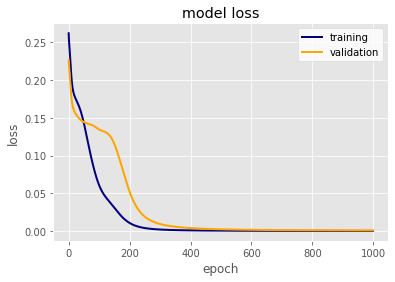

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.plot(net.val_loss_history, color='orange', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

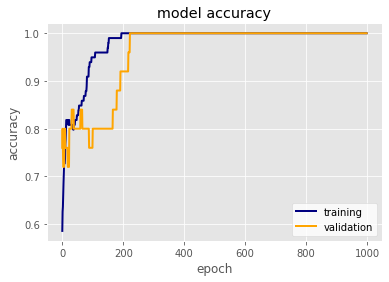

In [5]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.accuracy_history, color='navy', lw=2)
loss.plot(net.val_accuracy_history, color='orange', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('accuracy')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

In [6]:
# Test accuracy on test set.
out = net.predict(Xtest)
net.accuracy(ytest, out)

1.0

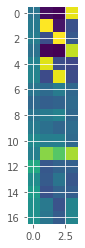

In [7]:
plt.imshow(net.layers[0].weights)

In [4]:
import numpy as np

from wavegrad.utility import train_test_split
from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils

# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = np_utils.to_categorical(y_train)

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

# Network
net = Sequential()
net.add(LayerDense(28*28, 100, tanh))                
net.add(LayerDense(100, 50, tanh))                   
net.add(LayerDense(50, 10, tanh))                    

optim = GD(net.layers, lr=0.01, momentum=0.6)
# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net.use(MSE)
net.fit(x_train[0:1000], y_train[0:1000], epochs=35, optimizer=optim)

  0%|          | 0/35 [00:00<?, ?it/s]

(1, 784)


ValueError: cannot reshape array of size 784 into shape (1,1)

In [4]:
out = net.predict(x_test)

In [5]:
net.accuracy(y_test, np.round(out))

0.629899999999947

# Tensorflow model to compare with mine

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.Sequential([
    keras.Input(shape=(17,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='tanh')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


The problem here is that Tensorflow don't have the Gradient Descent methos, but only the SGD so i have to implement it to compare the two networks

In [9]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [10]:
history = model.fit(
    Xtrain ,ytrain, epochs=500, batch_size=len(Xtrain)
)

Epoch 1/500
1/1 [==============================] - 0s 863us/step - loss: 0.4962 - accuracy: 0.4758
Epoch 2/500
1/1 [==============================] - 0s 843us/step - loss: 0.4807 - accuracy: 0.4758
Epoch 3/500
1/1 [==============================] - 0s 756us/step - loss: 0.4535 - accuracy: 0.4677
Epoch 4/500
1/1 [==============================] - 0s 608us/step - loss: 0.4195 - accuracy: 0.4516
Epoch 5/500
1/1 [==============================] - 0s 935us/step - loss: 0.3837 - accuracy: 0.4758
Epoch 6/500
1/1 [==============================] - 0s 779us/step - loss: 0.3506 - accuracy: 0.4758
Epoch 7/500
1/1 [==============================] - 0s 908us/step - loss: 0.3232 - accuracy: 0.4758
Epoch 8/500
1/1 [==============================] - 0s 865us/step - loss: 0.3027 - accuracy: 0.4839
Epoch 9/500
1/1 [==============================] - 0s 649us/step - loss: 0.2891 - accuracy: 0.4516
Epoch 10/500
1/1 [==============================] - 0s 685us/step - loss: 0.2815 - accuracy: 0.5000
Epoch 11/

In [11]:
out = model.predict(Xtrain)

In [12]:
out

array([[ 0.36476317],
       [ 0.37726066],
       [ 0.16110736],
       [ 0.29502416],
       [ 0.21770692],
       [ 0.22648835],
       [ 0.11529781],
       [-0.00424468],
       [ 0.6788523 ],
       [ 0.8291059 ],
       [ 0.38900843],
       [ 0.45696703],
       [ 0.33960238],
       [ 0.75531864],
       [ 0.2578091 ],
       [ 0.25546193],
       [ 0.12822352],
       [ 0.26036102],
       [ 0.22247815],
       [ 0.32227805],
       [ 0.20095304],
       [ 0.08568051],
       [ 0.07165043],
       [ 0.19664642],
       [ 0.29237512],
       [ 0.29106435],
       [ 0.34080538],
       [ 0.31580222],
       [ 0.11305197],
       [ 0.08399444],
       [ 0.7502239 ],
       [ 0.19846714],
       [ 0.29516426],
       [ 0.18360636],
       [ 0.18307969],
       [ 0.2753348 ],
       [ 0.68959904],
       [ 0.04742132],
       [ 0.14614426],
       [ 0.03103038],
       [ 0.02384963],
       [ 0.7574607 ],
       [ 0.15255205],
       [ 0.13135988],
       [ 0.12952748],
       [ 0

In [13]:
net.accuracy(ytest, out)

62.0

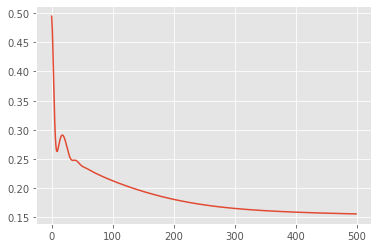

In [12]:
plt.plot(history.history['loss'])

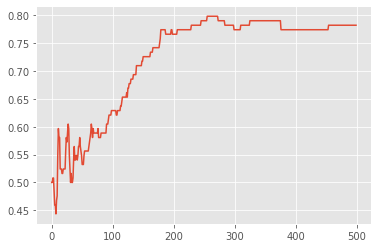

In [13]:
plt.plot(history.history['accuracy'])